In [ ]:
# Install required packages for the analysis
%pip install pandas numpy matplotlib seaborn scipy statsmodels

# Fleiss' Kappa Agreement Analysis

This analysis evaluates inter-rater reliability across three separate rating tables, each completed by a different rater. All raters evaluated the same set of responses using the same rubric dimensions.

### Rating Dimensions

Each rater provided ratings on the following **Likert-scale** dimensions:

- **Clarity**
- **Relevance**
- **Persuasiveness**
- **Concern for Long-Term Consequences**
- **Practical Usefulness**
- **Awareness of Contextual Conditions**

Each rating table includes the following columns:
- `AnswerId`
- `Content`
- The six rubric dimensions listed above

---

### Step 1: Overall Fleiss' Kappa

Using the three rater files, we first compute **Fleiss' Kappa for each rubric dimension** across **all answers** — regardless of group assignment — to assess overall inter-rater agreement (since the ratings are made without knowing the group).

---

### Step 2: Group-Based Fleiss' Kappa

We then merge the ratings with `AnswerID_Group.csv`, which maps each `AnswerId` to a group:

- **Control**
- **Treatment**

With this grouping, we calculate Fleiss' Kappa **separately for**:
- 🟦 **Control group only**
- 🟥 **Treatment group only**

This allows us to assess whether inter-rater agreement differs across experimental conditions.

---

### Step 3: Quality Check & Next Steps

- ✅ If Fleiss' Kappa scores indicate acceptable inter-rater reliability across dimensions and groups, we proceed with further analysis.
- ⚠️ If Kappa scores are low or inconsistent, we pause to **resolve rating conflicts** before continuing.

---

> **Note:** Fleiss' Kappa is applied per rubric dimension, treating Likert-scale ratings as categorical for the purpose of measuring agreement among multiple raters.


In [1]:
import pandas as pd
import numpy as np
import re
from statsmodels.stats.inter_rater import fleiss_kappa

def clean_columns(df):
    df.columns = [re.sub(r'[\u200B-\u200D\uFEFF]', '', col).strip() for col in df.columns]
    return df

rater1 = clean_columns(pd.read_csv("ratings/RatingTable1.csv"))
rater2 = clean_columns(pd.read_csv("ratings/RatingTable2.csv"))
rater3 = clean_columns(pd.read_csv("ratings/RatingTable3.csv"))

dataset= pd.read_csv("ratings/AnswerID_Group.csv")

##all the files are already ordered by AnswerId
rater1["Group"]=dataset["Group"]
rater2["Group"]=dataset["Group"]
rater3["Group"]=dataset["Group"]


rater1Control = rater1[rater1['Group']=='C'].reset_index(drop=True)
rater1Treatment = rater1[rater1['Group']=='T'].reset_index(drop=True)

rater2Control = rater2[rater2['Group']=='C'].reset_index(drop=True)
rater2Treatment = rater2[rater2['Group']=='T'].reset_index(drop=True)

rater3Control = rater3[rater3['Group']=='C'].reset_index(drop=True)
rater3Treatment = rater3[rater3['Group']=='T'].reset_index(drop=True)



dimensions = [
    'Clarity',
    'Relevance',
    'Persuasiveness',
    'Concern for Long-Term Consequences',
    'Practical Usefulness',
    'Awareness of Contextual Conditions'
]

####Control
kappa_results_Control = {}

for dim in dimensions:
    if dim not in rater1Control.columns or dim not in rater2Control.columns or dim not in rater3Control.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1Control)):
        try:
            scores = [
                int(rater1Control.loc[i, dim]),
                int(rater2Control.loc[i, dim]),
                int(rater3Control.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results_Control[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Control):")
for dim, kappa in kappa_results_Control.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")

####Treatment
kappa_results_Treatment = {}

for dim in dimensions:
    if dim not in rater1Treatment.columns or dim not in rater2Treatment.columns or dim not in rater3Treatment.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1Treatment)):
        try:
            scores = [
                int(rater1Treatment.loc[i, dim]),
                int(rater2Treatment.loc[i, dim]),
                int(rater3Treatment.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results_Treatment[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Treatment):")
for dim, kappa in kappa_results_Treatment.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")


###Total
kappa_results = {}
for dim in dimensions:
    if dim not in rater1.columns or dim not in rater2.columns or dim not in rater3.columns:
        print(f"⚠️  Dimension '{dim}' not found in one or more files. Skipping.")
        continue

    ratings_matrix = []

    for i in range(len(rater1)):
        try:
            scores = [
                int(rater1.loc[i, dim]),
                int(rater2.loc[i, dim]),
                int(rater3.loc[i, dim])
            ]
            # Count number of ratings for each value from 1 to 5
            row = [scores.count(score) for score in range(1, 6)]
            ratings_matrix.append(row)
        except ValueError:
            print(f"⚠️  Non-numeric rating at row {i+1} in dimension '{dim}'. Skipping row.")
    
    if not ratings_matrix:
        print(f"⚠️  No valid data for dimension '{dim}'. Skipping.")
        continue

    ratings_array = np.array(ratings_matrix)
    kappa = fleiss_kappa(ratings_array)
    kappa_results[dim] = kappa

# Print results
print("\n📊 Fleiss' Kappa Results (Total):")
for dim, kappa in kappa_results.items():
    status = '✓' if kappa > 0.6 else '✗'
    print(f"{dim:<45} Fleiss' Kappa = {kappa:.3f} {status}")



📊 Fleiss' Kappa Results (Control):
Clarity                                       Fleiss' Kappa = 0.638 ✓
Relevance                                     Fleiss' Kappa = 0.627 ✓
Persuasiveness                                Fleiss' Kappa = 0.696 ✓
Concern for Long-Term Consequences            Fleiss' Kappa = 0.602 ✓
Practical Usefulness                          Fleiss' Kappa = 0.595 ✗
Awareness of Contextual Conditions            Fleiss' Kappa = 0.592 ✗

📊 Fleiss' Kappa Results (Treatment):
Clarity                                       Fleiss' Kappa = 0.631 ✓
Relevance                                     Fleiss' Kappa = 0.794 ✓
Persuasiveness                                Fleiss' Kappa = 0.625 ✓
Concern for Long-Term Consequences            Fleiss' Kappa = 0.681 ✓
Practical Usefulness                          Fleiss' Kappa = 0.709 ✓
Awareness of Contextual Conditions            Fleiss' Kappa = 0.672 ✓

📊 Fleiss' Kappa Results (Total):
Clarity                                       Fleiss

# Final Dataset Creation

After reaching sufficient agreement among raters (via Fleiss' Kappa analysis and any necessary conflict resolution), we proceed to create the **final dataset**.

This dataset was constructed **manually** (not via automated code) by averaging the ratings across the three raters for each answer.

### Final Dataset Structure

Each row in the final dataset represents one answer, with the following columns:

- `AnswerId`
- `Content`
- `Dilemma ID`
- `Group` (Control or Treatment)

Followed by the **average scores** (from the three raters) for each rubric dimension:

- `Clarity`
- `Relevance`
- `Persuasiveness`
- `Concern for Long-Term Consequences`
- `Practical Usefulness`
- `Awareness of Contextual Conditions`

### Notes

- All scores are averaged from **Likert-scale ratings** given by the three independent raters.
- Manual review and averaging ensured consistency after resolving any inter-rater disagreements.


#
#

# Statistical Analysis of Final Ratings Dataset

This document summarizes the statistical procedures applied to the final dataset of ratings, constructed by averaging the scores from three independent raters after achieving agreement.

---

## Libraries and Setup

The analysis uses the following libraries:

- `pandas`, `numpy`: Data manipulation and numerical operations
- `matplotlib`, `seaborn`: Visualization
- `scipy.stats`, `statsmodels`: Statistical testing and corrections
- `warnings`: Suppresses non-critical output

The plotting style is set to maintain consistent formatting throughout the visualizations.

---

## Dataset Overview and Preprocessing

- The dataset `FinalDataset.csv` contains 50 observations: 25 in the treatment group and 25 in the control group.
- The following dimensions are evaluated:
  - Clarity  
  - Relevance  
  - Persuasiveness  
  - Concern for Long-Term Consequences (renamed `LongTerm`)  
  - Practical Usefulness (renamed `Usefulness`)  
  - Awareness of Contextual Conditions (renamed `Context`)  
- Each row corresponds to a unique answer with averaged scores across dimensions.

---

## Visualization

Two types of plots are generated:

1. **Distributions**  
   Histograms display the density of scores per group for each dimension.

2. **Box Plots**  
   Compare the spread and central tendency of scores between treatment and control.

In addition, Q-Q plots are used to visually assess the normality assumption, especially relevant given the small sample size (n=25 per group). All plots are saved as PNG files.

---

## Statistical Analysis Procedure

Each dimension is analyzed using the following steps:

1. **Descriptive Statistics**  
   - Mean, median, and standard deviation for each group  
   - Differences in mean and median between groups  

2. **Normality Testing**  
   - Shapiro-Wilk test is applied to each group  
   - If both groups meet the assumption of normality, an independent t-test is used  
   - If normality is violated, the Mann-Whitney U test is applied  

3. **Effect Size Calculation**  
   - Cohen’s d (for parametric effect size)  
   - Rank-biserial correlation (for non-parametric interpretation) (most important in our case, with our data) 
   - Common Language Effect Size (CLES)  

4. **Bootstrap Confidence Intervals**  
   - 95% confidence intervals for the median difference are estimated using bootstrap resampling (10,000 iterations)  

5. **Power Analysis**  
   - Computes the statistical power based on effect size and sample size  

---

## Multiple Comparison Correction

To adjust for testing across multiple dimensions (six total), two correction methods are applied:

- **Bonferroni Correction**: Sets a conservative threshold (`alpha / 6`)
- **False Discovery Rate (FDR, Benjamini-Hochberg method)**: Controls for expected proportion of false positives

A comparison table summarizes p-values and significance under both correction strategies.

---

## Summary Table and Export

A summary DataFrame includes:

- Group-wise means and medians
- Test statistics and p-values
- Effect sizes (Cohen’s d, rank-biserial)
- Bootstrap confidence intervals
- Significance status after Bonferroni and FDR corrections

Results are saved to `statistical_analysis_results.csv`.

---

## Notes

- The analysis emphasizes both statistical significance and effect size interpretation.
- Given the sample size (n=25 per group), non-parametric methods and visual normality checks are prioritized where appropriate.
- Correction for multiple comparisons is necessary due to the number of dimensions tested.


SAMPLE SIZE VERIFICATION:
Group
T    25
C    25
Name: count, dtype: int64
Total sample: 50
✅ Sample sizes confirmed: 25 per group

=== COMPREHENSIVE STATISTICAL ANALYSIS ===

Creating visualizations...


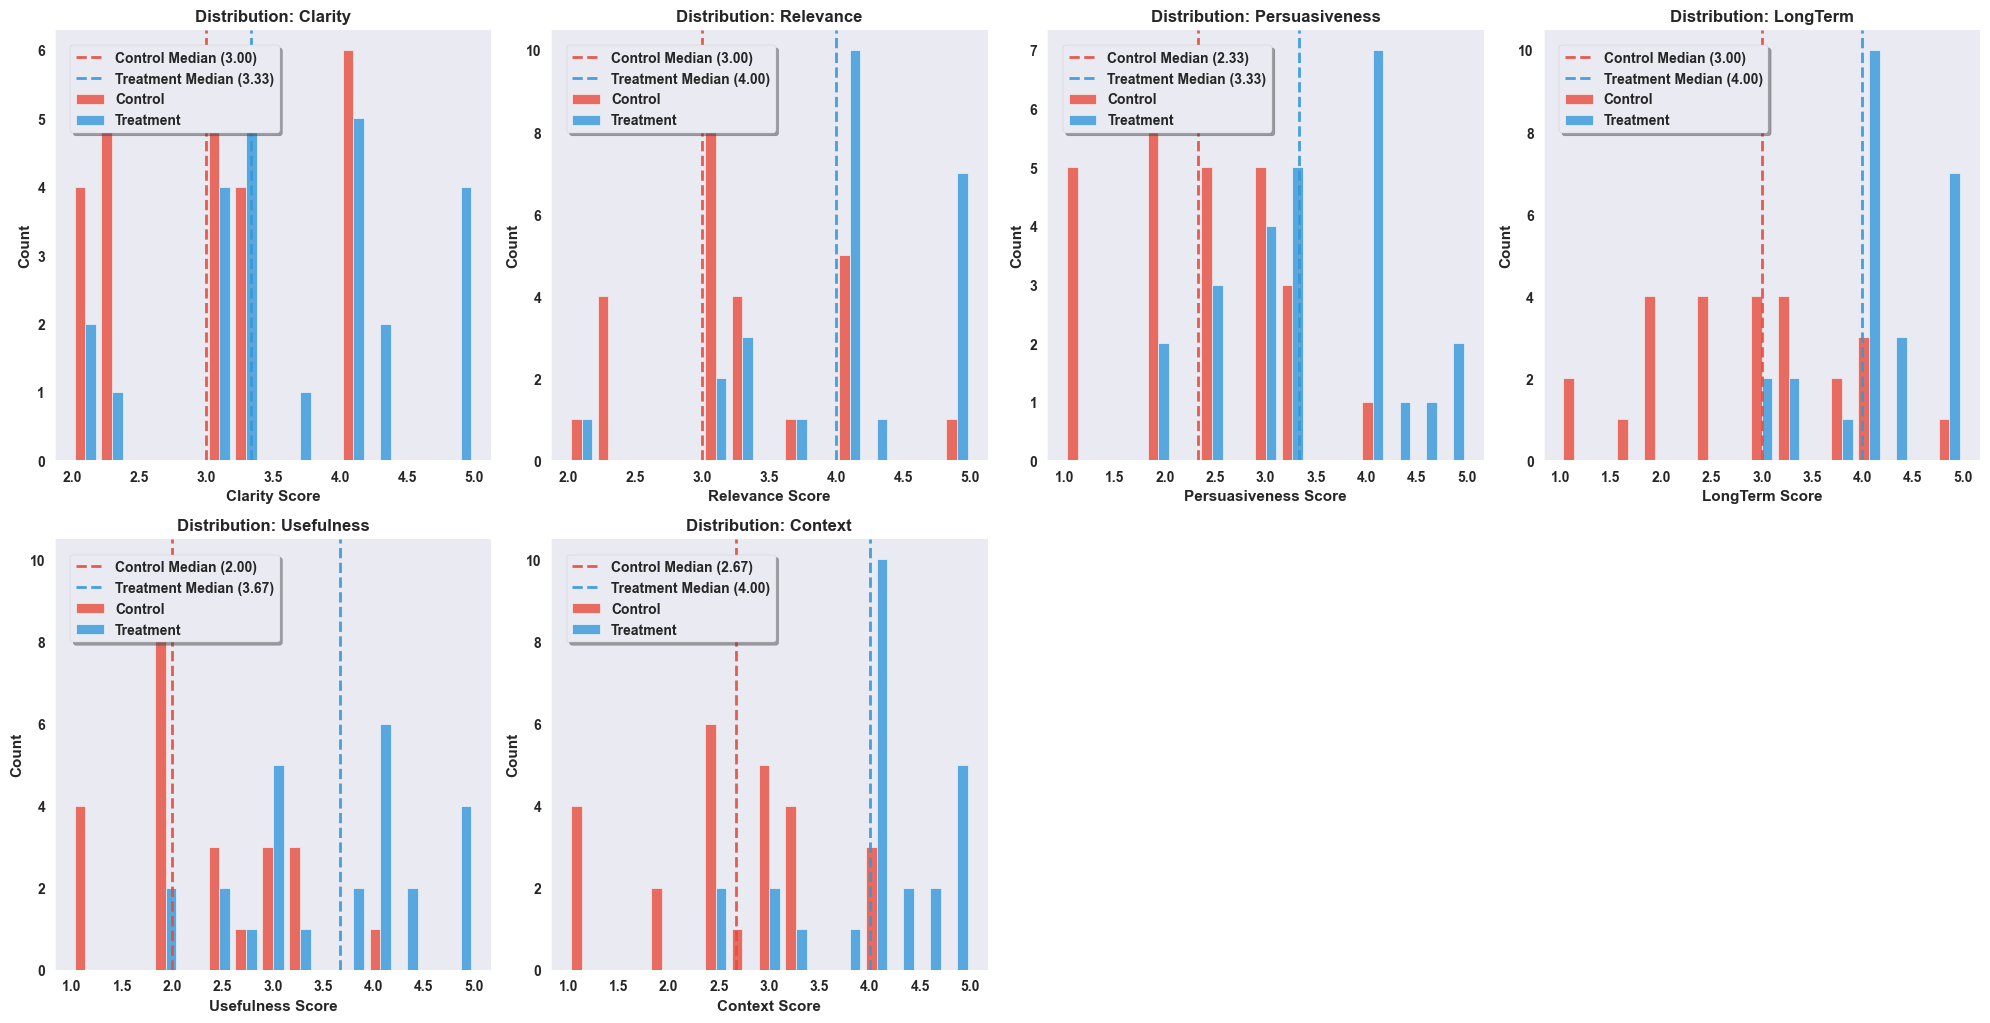

Saved 6 individual distribution plots to ../../paper/plots


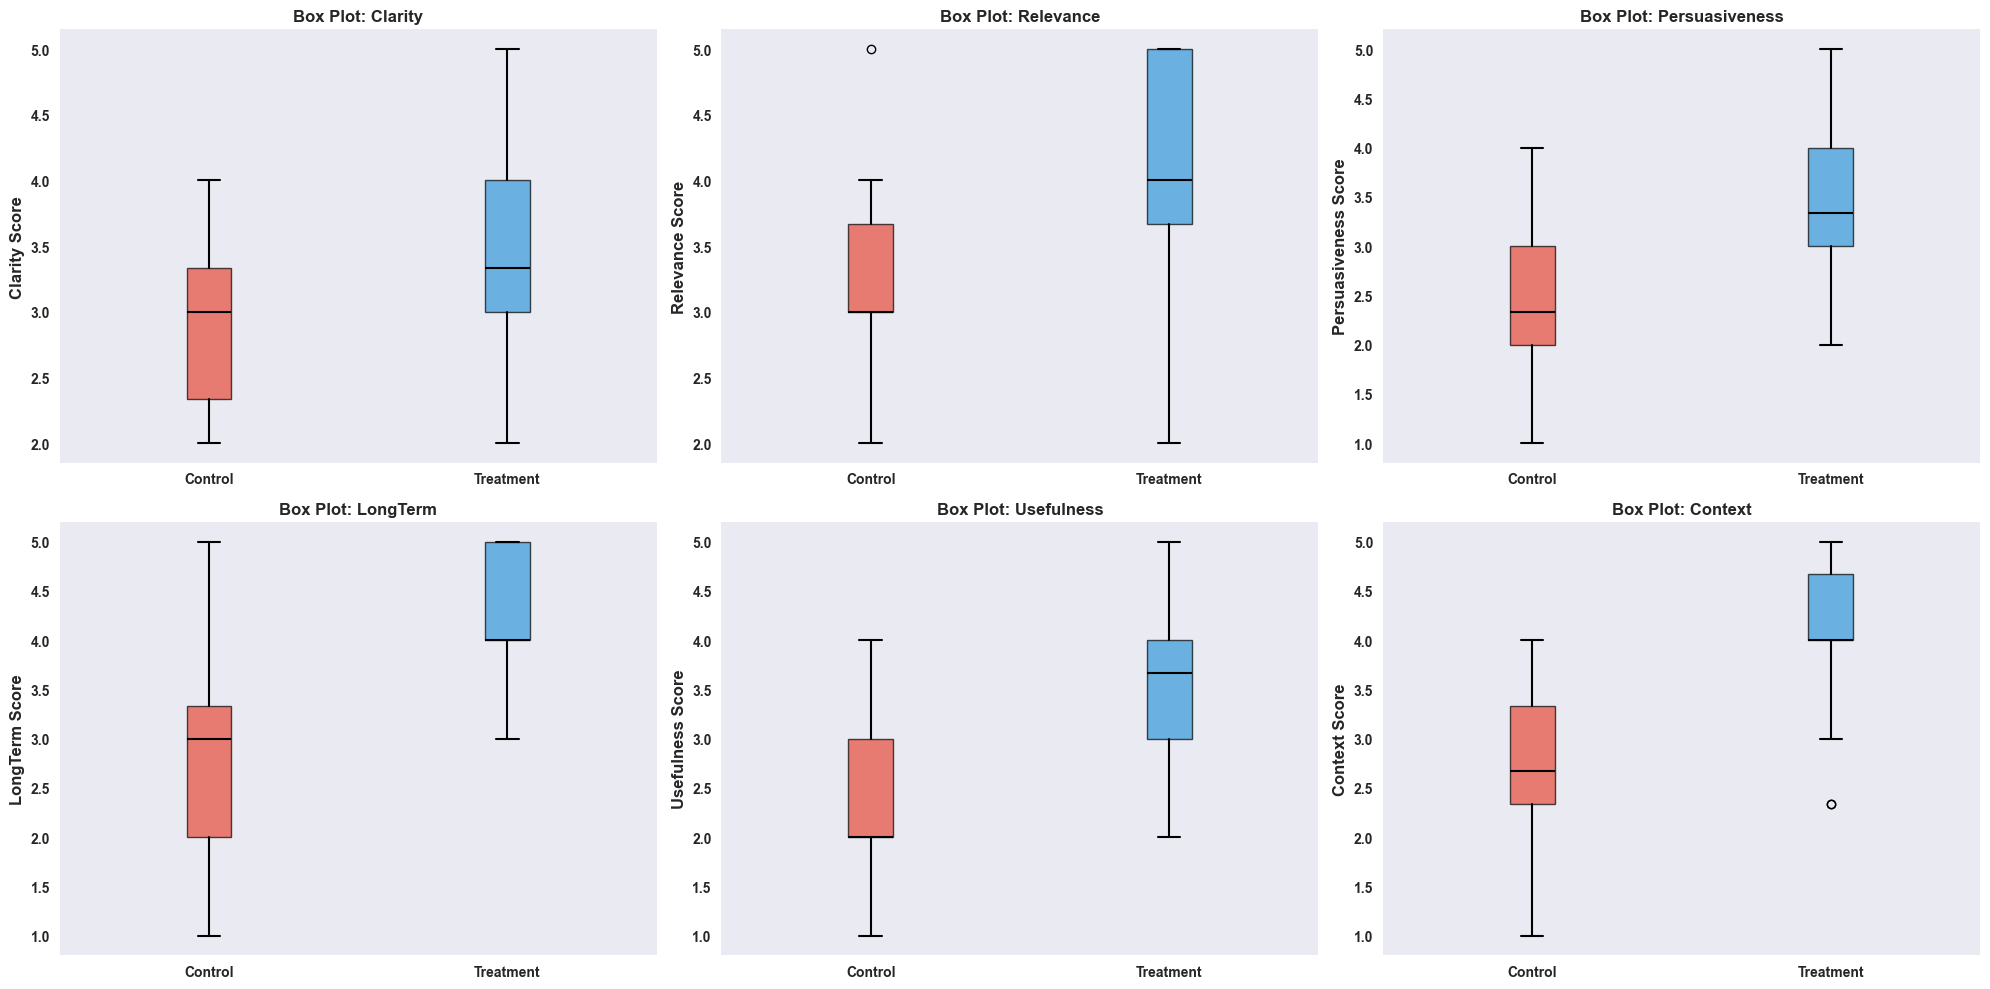


=== DETAILED RESULTS BY DIMENSION ===


DIMENSION: CLARITY

DESCRIPTIVE STATISTICS:
Treatment: n=25, mean=3.627, median=3.333, std=0.873
Control:   n=25, mean=3.000, median=3.000, std=0.726
Mean difference: 0.627
Median difference: 0.333

NORMALITY ASSESSMENT:
Treatment Shapiro-Wilk: W=0.9385, p=0.1365
Control Shapiro-Wilk:   W=0.8817, p=0.0075
Both groups normal: No
⚠️  Borderline normality - recommend visual inspection

STATISTICAL TEST: Mann-Whitney U
Test statistic: 439.5000
p-value (one-tailed): 0.006342
Estimated statistical power: 0.788

EFFECT SIZES:
Cohen's d: 0.780
Rank-biserial correlation: 0.406
Common Language Effect Size: 0.703
Effect magnitude: medium (Cohen's d = 0.780)

BOOTSTRAP 95% CI for median difference: [0.000, 1.333]

RESULT: ✅ SIGNIFICANT

DIMENSION: RELEVANCE

DESCRIPTIVE STATISTICS:
Treatment: n=25, mean=4.040, median=4.000, std=0.778
Control:   n=25, mean=3.213, median=3.000, std=0.693
Mean difference: 0.827
Median difference: 1.000

NORMALITY ASSESSMENT:
T

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from scipy.stats import ranksums, permutation_test
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import warnings
import os
warnings.filterwarnings('ignore')

# Set font to Arial and make text bold
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['legend.title_fontsize'] = 10

# Set style for better plots (but we'll customize further)
plt.style.use('seaborn-v0_8')

# Create directory for plots if it doesn't exist
plots_dir = '../../paper/plots'
os.makedirs(plots_dir, exist_ok=True)
# Load the dataset
df = pd.read_csv("ratings/FinalDataset.csv")

# Verify sample sizes
print("SAMPLE SIZE VERIFICATION:")
print(df['Group'].value_counts())
print(f"Total sample: {len(df)}")
assert len(df) == 50, f"Expected 50 rows, got {len(df)}"
assert df['Group'].value_counts()['T'] == 25, "Expected 25 treatment cases"
assert df['Group'].value_counts()['C'] == 25, "Expected 25 control cases"
print("✅ Sample sizes confirmed: 25 per group\n")

# Clean column names for convenience
df = df.rename(columns={
    'Concern for Long-Term Consequences': 'LongTerm',
    'Practical Usefulness': 'Usefulness',
    'Awareness of Contextual Conditions': 'Context'
})

# List of dimensions
dimensions = ['Clarity', 'Relevance', 'Persuasiveness', 'LongTerm', 'Usefulness', 'Context']

# Separate into groups
treatment = df[df['Group'] == 'T']
control = df[df['Group'] == 'C']

# =============================================================================
# 1. VISUALIZATION SECTION
# =============================================================================
def qq_plot_check(data, title):
    """Create Q-Q plot for normality assessment - important for small samples"""
    from scipy import stats
    
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot: {title}')
    plt.grid(True, alpha=0.3)
    plt.show()

def create_comprehensive_plots(df, dimensions):
    """Create comprehensive visualization plots and save individual PNGs with improved styling"""
    
    # Define better colors
    control_color = '#E74C3C'      # Professional red
    treatment_color = '#3498DB'    # Professional blue
    
    # Set up the plotting area for combined plot
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Distribution plots for each dimension
    for i, dim in enumerate(dimensions, 1):
        plt.subplot(3, 4, i)
        
        # Get data for both groups
        treatment_data = df[df['Group'] == 'T'][dim].dropna()
        control_data = df[df['Group'] == 'C'][dim].dropna()
        
        # Create bins
        all_data = pd.concat([control_data, treatment_data])
        bins = np.linspace(all_data.min(), all_data.max(), 16)
        
        # Calculate histogram data
        control_counts, _ = np.histogram(control_data, bins=bins, density=False)
        treatment_counts, _ = np.histogram(treatment_data, bins=bins, density=False)
        
        # Create bin centers for x-axis
        bin_centers = (bins[:-1] + bins[1:]) / 2
        width = (bins[1] - bins[0]) * 0.4  # Bar width
        
        # Create side-by-side bars with better colors
        plt.bar(bin_centers - width/2, control_counts, width, 
                alpha=0.8, label='Control', color=control_color, edgecolor='white', linewidth=0.5)
        plt.bar(bin_centers + width/2, treatment_counts, width, 
                alpha=0.8, label='Treatment', color=treatment_color, edgecolor='white', linewidth=0.5)
        
        # Add median lines for reference (appropriate for Mann-Whitney U tests)
        control_median = control_data.median()
        treatment_median = treatment_data.median()
        
        plt.axvline(control_median, color=control_color, linestyle='--', linewidth=2, alpha=0.9, label=f'Control Median ({control_median:.2f})')
        plt.axvline(treatment_median, color=treatment_color, linestyle='--', linewidth=2, alpha=0.9, label=f'Treatment Median ({treatment_median:.2f})')
        
        plt.xlabel(f'{dim} Score', fontweight='bold', fontfamily='Arial')
        plt.ylabel('Count', fontweight='bold', fontfamily='Arial')
        plt.title(f'Distribution: {dim}', fontweight='bold', fontfamily='Arial', fontsize=12)
        
        # Legend with better positioning
        plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True, fancybox=True, shadow=True, fontsize=10)
        
        # Remove grid and improve appearance
        plt.grid(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_linewidth(0.5)
        plt.gca().spines['bottom'].set_linewidth(0.5)
    
    # Save the complete figure
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'all_distributions.png'), dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
    # Now create and save individual plots with the same styling
    for dim in dimensions:
        # Create new figure for individual plot
        plt.figure(figsize=(10, 7))
        
        # Get data for both groups
        treatment_data = df[df['Group'] == 'T'][dim].dropna()
        control_data = df[df['Group'] == 'C'][dim].dropna()
        
        # Create bins
        all_data = pd.concat([control_data, treatment_data])
        bins = np.linspace(all_data.min(), all_data.max(), 16)
        
        # Calculate histogram data
        control_counts, _ = np.histogram(control_data, bins=bins, density=True)
        treatment_counts, _ = np.histogram(treatment_data, bins=bins, density=True)
        
        # Create bin centers for x-axis
        bin_centers = (bins[:-1] + bins[1:]) / 2
        width = (bins[1] - bins[0]) * 0.4  # Bar width
        
        # Create side-by-side bars
        plt.bar(bin_centers - width/2, control_counts, width, 
                alpha=0.8, label='Control', color=control_color, edgecolor='white', linewidth=0.5)
        plt.bar(bin_centers + width/2, treatment_counts, width, 
                alpha=0.8, label='Treatment', color=treatment_color, edgecolor='white', linewidth=0.5)
        
        # Add median lines for reference (appropriate for Mann-Whitney U tests)
        control_median = control_data.median()
        treatment_median = treatment_data.median()
        
        plt.axvline(control_median, color=control_color, linestyle='--', linewidth=2.5, alpha=0.9)
        plt.axvline(treatment_median, color=treatment_color, linestyle='--', linewidth=2.5, alpha=0.9)
        
        # Add text annotations for median values
        plt.text(control_median, plt.ylim()[1]*0.9, f'Control\nMedian: {control_median:.2f}', 
                ha='center', va='top', fontweight='bold', fontsize=10, 
                bbox=dict(boxstyle='round,pad=0.3', facecolor=control_color, alpha=0.2))
        plt.text(treatment_median, plt.ylim()[1]*0.75, f'Treatment\nMedian: {treatment_median:.2f}', 
                ha='center', va='top', fontweight='bold', fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', facecolor=treatment_color, alpha=0.2))
        
        plt.xlabel(f'{dim} Score', fontweight='bold', fontfamily='Arial', fontsize=14)
        plt.ylabel('Density', fontweight='bold', fontfamily='Arial', fontsize=14)
        plt.title(f'Distribution: {dim}', fontweight='bold', fontfamily='Arial', fontsize=16)
        plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), frameon=True, fancybox=True, shadow=True, fontsize=10)

        # Remove grid and improve appearance
        plt.grid(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['left'].set_linewidth(1)
        plt.gca().spines['bottom'].set_linewidth(1)
        
        # Improve tick labels
        plt.xticks(fontweight='bold', fontfamily='Arial')
        plt.yticks(fontweight='bold', fontfamily='Arial')
        
        # Save individual plot to paper/plots directory
        filename = f'distribution_{dim.lower().replace(" ", "_").replace("-", "_")}.png'
        filepath = os.path.join(plots_dir, filename)
        plt.savefig(filepath, dpi=300, bbox_inches='tight', facecolor='white')
        plt.close()  # Close the figure to free memory
        
    print(f"Saved {len(dimensions)} individual distribution plots to {plots_dir}")

    # 2. Box plots comparison (updated styling)
    fig = plt.figure(figsize=(20, 10))
    for i, dim in enumerate(dimensions, 1):
        plt.subplot(2, 3, i)
        
        # Prepare data for box plot
        data_to_plot = [df[df['Group'] == 'C'][dim].dropna(), 
                       df[df['Group'] == 'T'][dim].dropna()]
        
        box_plot = plt.boxplot(data_to_plot, labels=['Control', 'Treatment'], patch_artist=True)
        box_plot['boxes'][0].set_facecolor(control_color)
        box_plot['boxes'][0].set_alpha(0.7)
        box_plot['boxes'][1].set_facecolor(treatment_color)
        box_plot['boxes'][1].set_alpha(0.7)
        
        # Style the box plot elements
        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(box_plot[element], color='black', linewidth=1.5)
        
        plt.ylabel(f'{dim} Score', fontweight='bold', fontfamily='Arial', fontsize=12)
        plt.title(f'Box Plot: {dim}', fontweight='bold', fontfamily='Arial', fontsize=12)
        plt.grid(False)
        
        # Clean up box plot appearance
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)
        plt.xticks(fontweight='bold', fontfamily='Arial')
        plt.yticks(fontweight='bold', fontfamily='Arial')
    
    plt.tight_layout()
    plt.savefig(os.path.join(plots_dir, 'comprehensive_analysis_plots.png'), dpi=300, bbox_inches='tight', facecolor='white')
    plt.show()
    
def calculate_effect_sizes_corrected(group1, group2):
    """Calculate effect sizes with corrected rank-biserial correlation"""
    
    # Cohen's d
    pooled_std = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / 
                        (len(group1) + len(group2) - 2))
    cohens_d = (group1.mean() - group2.mean()) / pooled_std
    
    # Corrected rank-biserial correlation calculation
    n1, n2 = len(group1), len(group2)
    
    # Get U statistics for both directions
    U1, _ = mannwhitneyu(group1, group2, alternative='two-sided')
    U2 = n1 * n2 - U1  # The other U statistic
    
    # Use the smaller U for rank-biserial calculation
    U_min = min(U1, U2)
    
    # Rank-biserial correlation (corrected)
    # Positive when group1 > group2, negative when group1 < group2
    if group1.median() > group2.median():
        rank_biserial = 1 - (2 * U_min) / (n1 * n2)
    else:
        rank_biserial = -1 + (2 * U_min) / (n1 * n2)
    
    
    # Common Language Effect Size
    cles = U1 / (n1 * n2)
    
    return {
        'cohens_d': cohens_d,
        'rank_biserial': rank_biserial,
        'cles': cles,
        'U1': U1,
        'U2': U2
    }


def bootstrap_median_difference(group1, group2, n_bootstrap=10000):
    """Calculate bootstrap confidence interval for median difference - optimized for n=25"""
    
    def median_diff(x, y):
        return np.median(x) - np.median(y)
    
    bootstrap_diffs = []
    n1, n2 = len(group1), len(group2)
    
    # For small samples, use more bootstrap iterations for stability
    for _ in range(n_bootstrap):
        # Resample with replacement
        sample1 = np.random.choice(group1, size=n1, replace=True)
        sample2 = np.random.choice(group2, size=n2, replace=True)
        bootstrap_diffs.append(median_diff(sample1, sample2))
    
    # Calculate confidence interval
    ci_lower = np.percentile(bootstrap_diffs, 2.5)
    ci_upper = np.percentile(bootstrap_diffs, 97.5)
    
    return ci_lower, ci_upper, bootstrap_diffs

def calculate_power_analysis(group1, group2, alpha=0.05):
    """Estimate statistical power for the given sample sizes"""
    from scipy.stats import norm
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(group1) - 1) * group1.var() + (len(group2) - 1) * group2.var()) / 
                        (len(group1) + len(group2) - 2))
    effect_size = abs(group1.mean() - group2.mean()) / pooled_std
    
    # Approximate power calculation for two-sample test
    n_per_group = len(group1)  # assuming equal n
    z_alpha = norm.ppf(1 - alpha/2)  # two-tailed
    z_beta = effect_size * np.sqrt(n_per_group/2) - z_alpha
    power = norm.cdf(z_beta)
    
    return power, effect_size


print("=== COMPREHENSIVE STATISTICAL ANALYSIS ===\n")
print("Creating visualizations...")
create_comprehensive_plots(df, dimensions)


# Store results for multiple comparison correction
p_values = []
results_summary = []

print("\n=== DETAILED RESULTS BY DIMENSION ===\n")

for dim in dimensions:
    print(f"\n{'='*50}")
    print(f"DIMENSION: {dim.upper()}")
    print(f"{'='*50}")
    
    # Get data
    t_vals = treatment[dim].dropna()
    c_vals = control[dim].dropna()
    
    # Descriptive statistics
    print(f"\nDESCRIPTIVE STATISTICS:")
    print(f"Treatment: n={len(t_vals)}, mean={t_vals.mean():.3f}, median={t_vals.median():.3f}, std={t_vals.std():.3f}")
    print(f"Control:   n={len(c_vals)}, mean={c_vals.mean():.3f}, median={c_vals.median():.3f}, std={c_vals.std():.3f}")
    print(f"Mean difference: {t_vals.mean() - c_vals.mean():.3f}")
    print(f"Median difference: {t_vals.median() - c_vals.median():.3f}")
    
    # Normality tests + visual inspection (important for n=25)
    shapiro_t = shapiro(t_vals)
    shapiro_c = shapiro(c_vals)
    normal = shapiro_t.pvalue > 0.05 and shapiro_c.pvalue > 0.05
    
    print(f"\nNORMALITY ASSESSMENT:")
    print(f"Treatment Shapiro-Wilk: W={shapiro_t.statistic:.4f}, p={shapiro_t.pvalue:.4f}")
    print(f"Control Shapiro-Wilk:   W={shapiro_c.statistic:.4f}, p={shapiro_c.pvalue:.4f}")
    print(f"Both groups normal: {'Yes' if normal else 'No'}")
    
    # For small samples, also check Q-Q plots visually
    if shapiro_t.pvalue < 0.10 or shapiro_c.pvalue < 0.10:  # borderline cases
        print("⚠️  Borderline normality - recommend visual inspection")
        # Uncomment next lines to show Q-Q plots
    
    # Statistical test
    if normal:
        stat, p_val = ttest_ind(t_vals, c_vals, alternative='greater')
        test_name = "Independent t-test"
    else:
        stat, p_val = mannwhitneyu(t_vals, c_vals, alternative='greater')
        test_name = "Mann-Whitney U"
    
    p_values.append(p_val)
    
    print(f"\nSTATISTICAL TEST: {test_name}")
    print(f"Test statistic: {stat:.4f}")
    print(f"p-value (one-tailed): {p_val:.6f}")
    
    # Power analysis (especially important for n=25)
    power, cohen_d = calculate_power_analysis(t_vals, c_vals)
    print(f"Estimated statistical power: {power:.3f}")
    
    # Effect sizes
    effect_sizes = calculate_effect_sizes_corrected(t_vals, c_vals)
    print(f"\nEFFECT SIZES:")
    print(f"Cohen's d: {effect_sizes['cohens_d']:.3f}")
    print(f"Rank-biserial correlation: {effect_sizes['rank_biserial']:.3f}")
    print(f"Common Language Effect Size: {effect_sizes['cles']:.3f}")
    
    # Effect size interpretation for small samples
    d_magnitude = abs(effect_sizes['cohens_d'])
    r_magnitude = abs(effect_sizes['rank_biserial'])
    
    if d_magnitude < 0.2:
        effect_interp = "negligible"
    elif d_magnitude < 0.5:
        effect_interp = "small"
    elif d_magnitude < 0.8:
        effect_interp = "medium"
    else:
        effect_interp = "large"
    
    print(f"Effect magnitude: {effect_interp} (Cohen's d = {effect_sizes['cohens_d']:.3f})")
    
    # Bootstrap confidence interval
    ci_lower, ci_upper, _ = bootstrap_median_difference(t_vals, c_vals)
    print(f"\nBOOTSTRAP 95% CI for median difference: [{ci_lower:.3f}, {ci_upper:.3f}]")
    
    # Interpretation
    significance = "✅ SIGNIFICANT" if p_val < 0.05 else "❌ NOT SIGNIFICANT"
    print(f"\nRESULT: {significance}")
    
    # Store for summary
    results_summary.append({
        'dimension': dim,
        'treatment_mean': t_vals.mean(),
        'control_mean': c_vals.mean(),
        'treatment_median': t_vals.median(),
        'control_median': c_vals.median(),
        'test': test_name,
        'statistic': stat,
        'p_value': p_val,
        'cohens_d': effect_sizes['cohens_d'],
        'rank_biserial': effect_sizes['rank_biserial'],
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    })


print(f"\n{'='*70}")
print("MULTIPLE COMPARISON CORRECTION")
print(f"{'='*70}")

# Bonferroni correction
alpha = 0.05
bonferroni_alpha = alpha / len(dimensions)
print(f"Original alpha: {alpha}")
print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")

# FDR correction (recommended for n=25 per group)
reject_fdr, p_corrected_fdr, _, _ = multipletests(p_values, alpha=alpha, method='fdr_bh')

print(f"\nCORRECTED RESULTS (recommended: FDR for small samples):")
print(f"{'Dimension':<15} | {'p-value':<8} | {'Bonferroni':<12} | {'FDR':<12}")
print("-" * 55)

for i, dim in enumerate(dimensions):
    bonf_sig = "✅ p<.008" if p_values[i] < bonferroni_alpha else "❌ n.s."
    fdr_sig = "✅ significant" if reject_fdr[i] else "❌ n.s."
    
    print(f"{dim:<15} | {p_values[i]:<8.4f} | {bonf_sig:<12} | {fdr_sig:<12}")

# Count significant results
n_bonf_sig = sum([p < bonferroni_alpha for p in p_values])
n_fdr_sig = sum(reject_fdr)

print(f"\nSUMMARY:")
print(f"Significant with Bonferroni: {n_bonf_sig}/6 dimensions")
print(f"Significant with FDR: {n_fdr_sig}/6 dimensions")
print(f"\n💡 RECOMMENDATION: Use FDR correction for n=25 per group to balance Type I/II error risk")


print(f"\n{'='*70}")
print("SUMMARY TABLE")
print(f"{'='*70}")

summary_df = pd.DataFrame(results_summary)
summary_df['bonferroni_sig'] = summary_df['p_value'] < bonferroni_alpha
summary_df['fdr_sig'] = reject_fdr

print(summary_df[['dimension', 'treatment_median', 'control_median', 
                 'p_value', 'rank_biserial', 'bonferroni_sig', 'fdr_sig']].round(3))

# Save results
summary_df.to_csv('statistical_analysis_results.csv', index=False)
print(f"\nResults saved to 'statistical_analysis_results.csv'")

# Descriptive Statistics on Self-Assessment and Response Time

This section provides summary statistics of participants’ self-reported measures and response times, grouped by experimental condition.

- **Data Source:**  
  Questionnaire responses including confidence, perceived complexity, and effort ratings, as well as response time recorded as "minutes:seconds".

- **Data Processing:**  
  - Response times are converted from "MM:SS" format into total seconds for numerical analysis.  
  - Columns are renamed for clarity:  
    - Confidence  
    - Complexity  
    - Effort

- **Statistical Summary:**  
  For each group, calculate mean, median, and standard deviation for:  
  - Response time (displayed again as "MM:SS" for readability)  
  - Confidence  
  - Complexity  
  - Effort

- **Purpose:**  
  These descriptive statistics provide background information on participant engagement and perceived difficulty. They are not part of the main analysis but support interpretation of the results.

---

**Note:** Response time differences and self-assessment scores may help identify potential confounds or behavioral differences between groups.


In [ ]:
import pandas as pd
df=pd.read_csv("statistics_questionarie/ResponsesQuestionarie.csv")

df[['Minutes', 'Seconds']] = df['Time'].str.split(':', expand=True).astype(int)
df['TimeSeconds'] = df['Minutes'] * 60 + df['Seconds']


df = df.rename(columns={
    'How confident are you in your answer?': 'Confidence',
    'How complex did you find the dilemma?': 'Complexity',
    'How much effort did you put in reasoning before answering?': 'Effort'
})

summary = df.groupby('Group')[['TimeSeconds', 'Confidence', 'Complexity', 'Effort']].agg(['mean', 'median', 'std'])

def format_seconds(s):
    m = int(s // 60)
    sec = int(s % 60)
    return f"{m}:{sec:02d}"

for col in ['mean', 'median']:
    summary[('TimeSeconds', col)] = summary[('TimeSeconds', col)].apply(format_seconds)


summary.columns = ['_'.join(col).capitalize() for col in summary.columns]

print(summary)



      Timeseconds_mean Timeseconds_median  Timeseconds_std  Confidence_mean  \
Group                                                                         
C                12:00              11:22       336.431434             4.36   
T                16:12              15:16       419.205010             4.52   

       Confidence_median  Confidence_std  Complexity_mean  Complexity_median  \
Group                                                                          
C                    4.0        0.637704             3.68                4.0   
T                    5.0        0.509902             3.92                4.0   

       Complexity_std  Effort_mean  Effort_median  Effort_std  
Group                                                          
C            1.069268          4.2            4.0    0.866025  
T            1.115049          4.4            4.0    0.707107  


# Descriptive Statistics on Tool Usefulness Ratings

This section summarizes participants' evaluations of the AI-generated debate summary tool, as provided at the end of the dilemma in the Treatment group.

- **Data Source:**  
  Responses to Likert-scale items assessing the perceived usefulness of the debate summary tool:
  - **Reflection:** "To what extent did the debate summary help you reflect on the dilemma?"
  - **RealWorld:** "Would you want similar summaries to support real-world decisions?"

- **Data Processing:**  
  - Columns were renamed for clarity:
    - `Reflection`
    - `RealWorld`
  - Responses were converted to numeric format to ensure valid statistical calculations.
  - Invalid entries were coerced to `NaN` for exclusion from the analysis.

- **Statistical Summary:**  
  For both `Reflection` and `RealWorld` items, the following statistics were computed:
  - **Central tendency:** Mean, Median
  - **Dispersion:** Standard deviation
  - **Range:** Minimum and Maximum
  - **Distribution:** Frequency and percentage of each Likert response (1 to 5)

- **Purpose:**  
  These statistics provide an overview of how participants perceived the AI-generated summaries in terms of:
  - Supporting deeper reflection on the moral dilemmas
  - Their desirability in real-world decision-making contexts

---

**Note:**  
Only responses from the **Treatment group** (participants who received the AI-generated summaries) were analyzed. These descriptive results offer context on tool engagement and user-perceived value but are not part of the core inferential analysis.


In [20]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("statistics_questionarie/ToolQuestionarie.csv")

df = df.rename(columns={
    'To what extent did the debate summary help you reflect on the dilemma?': 'Reflection',
    'Would you want similar summaries to support real-world decisions?': 'RealWorld'
})

df['Reflection'] = pd.to_numeric(df['Reflection'], errors='coerce')
df['RealWorld'] = pd.to_numeric(df['RealWorld'], errors='coerce')

likert_stats = df[['Reflection', 'RealWorld']].agg(['mean', 'median', 'std', 'min', 'max'])

freq_reflection = df['Reflection'].value_counts().sort_index()
perc_reflection = (freq_reflection / freq_reflection.sum() * 100).round(2)

freq_realworld = df['RealWorld'].value_counts().sort_index()
perc_realworld = (freq_realworld / freq_realworld.sum() * 100).round(2)

print("\n=== Descriptive Statistics ===")
print(likert_stats)

print("\n=== Frequencies - Reflection ===")
print(freq_reflection)
print("\n=== Percentages - Reflection ===")
print(perc_reflection)

print("\n=== Frequencies - RealWorld ===")
print(freq_realworld)
print("\n=== Percentages - RealWorld ===")
print(perc_realworld)





=== Descriptive Statistics ===
        Reflection  RealWorld
mean      4.320000   4.440000
median    4.000000   5.000000
std       0.690411   0.869866
min       3.000000   1.000000
max       5.000000   5.000000

=== Frequencies - Reflection ===
Reflection
3     3
4    11
5    11
Name: count, dtype: int64

=== Percentages - Reflection ===
Reflection
3    12.0
4    44.0
5    44.0
Name: count, dtype: float64

=== Frequencies - RealWorld ===
RealWorld
1     1
4    10
5    14
Name: count, dtype: int64

=== Percentages - RealWorld ===
RealWorld
1     4.0
4    40.0
5    56.0
Name: count, dtype: float64
